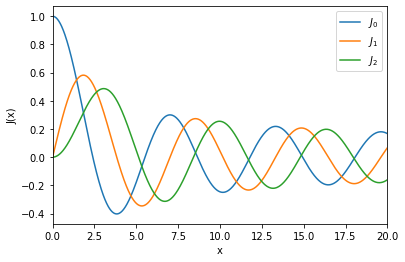

In [2]:
import numpy as np
import matplotlib.pyplot as plt



def J_Simp(m, x): #função de Bessel
    
    def f(teta):
        return np.cos( m*teta - x * np.sin(teta) )
    
    a = 0
    b = np.pi
    N = 1000
    h = (b-a)/N
    
    somaPar = 0
    for k in range(2,N,2):
        somaPar += f(a + k*h)
        
    somaImpar = 0    
    for k in range(1,N,2):
        somaImpar += f(a + k*h)
        
    return 1/np.pi * 1/3 * h * (f(a) + f(b,) + 4*somaImpar + 2*somaPar)

plt.figure(1)
x = np.linspace(0,20,num=1000)

plt.plot(x,J_Simp(0,x))
plt.plot(x,J_Simp(1,x))
plt.plot(x,J_Simp(2,x))
plt.legend(("$J_0$", "$J_1$", "$J_2$"))
plt.xlabel("x")
plt.ylabel("J(x)")
plt.xlim(0,20)
plt.show()

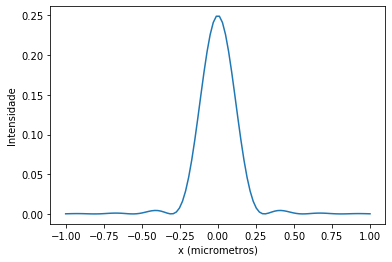

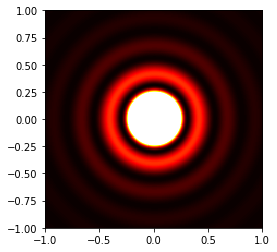

In [94]:
def I(r):
    Lambda = 0.5 # micrometros
    k = 2*np.pi / Lambda
    if r == 0:
        return ( 1 / 2 )**2
    else:
        return (J_Simp(1,k*r) / (k*r) )**2
    
########################################## Ver a onda de lado ###############
x = np.linspace(-1,1,100) 
y = np.zeros(x.shape)
for i in range(100): 
    y[i] = I(x[i])

plt.plot(x,y)
plt.ylabel("Intensidade")
plt.xlabel("x (micrometros)")
plt.show()
####################################### Ver onda do topo #####################            

def r(x, y):
    return np.sqrt(x**2 + y**2)

pontos = 200
lado = 2 # micrometros
spacing = lado / pontos # espaço entre pontos

xCentro = lado / 2
yCentro = lado / 2

grelha = np.empty([pontos,pontos])

for a in range(pontos):
    x = spacing * a
    for b in range(pontos):
        y = spacing * b
        dist = r(x - xCentro, y - yCentro)
        grelha[a,b] = I(dist)
        
plt.imshow(grelha, origin="lower", extent=[-1,1,-1,1], vmax=0.01)
plt.hot()
plt.show()
#este programa demora algum tempo..., diminuir o nº de pontos ajuda

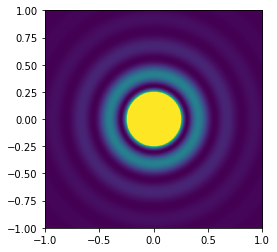

In [20]:
####### SOLUÇÃO DO PROFESSOR #######
plt.figure(2)
x,y = np.mgrid[-1:1:1000j,-1:1:1000j]

r = np.sqrt(x**2 + y**2)
Lambda = 0.5
k= 2*np.pi/Lambda

I = (J_Simp(1,r*k)/k/r)**2

plt.imshow(I, vmax=0.01, extent=(-1,1,-1,1))
plt.show()

# np.mgrid[-1:1:5j]
#---> array([-1. , -0.5,  0. ,  0.5,  1. ])